In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [261]:
df20=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv')
df19=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
df18=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv')
df17=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
df16=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv')
df15=pd.read_csv(r'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv')

#Dt=[df20,df19,df18,df17,df16,df15]
#Df=pd.concat(Dt, axis=0, ignore_index=True)
#Df.head(2)

In [288]:
df=df19

In [289]:
i=df[df['minutes'].isna()].index
df=df.drop(i)
j=df[df['loser_age'].isna()].index
df=df.drop(j)
k=df[df['winner_age'].isna()].index
df=df.drop(k)
l=df[df['surface']=="None"].index
df=df.drop(l)
m=df[df['minutes']==0].index
df=df.drop(m)

In [290]:
df.loser_rank=np.where(df.loser_rank.isnull(),1500,df.loser_rank)

In [291]:
df.winner_rank=np.where(df.winner_rank.isnull(),1500,df.winner_rank)

In [292]:
df=df[['tourney_name', 'match_num','surface',
       'tourney_date', 'winner_id', 'winner_hand', 'winner_age',
       'loser_id', 'loser_hand','loser_age', 'best_of',
       'minutes', 'winner_rank', 'loser_rank']]

In [293]:
df['match_id']=df['tourney_date'].astype(str)+df['match_num'].astype(str)+df['tourney_name']
df['winner_rank_diff']=df['winner_rank']-df['loser_rank']
df['loser_rank_diff']=df['loser_rank']-df['winner_rank']
df['winner_age_diff']=df['winner_age']-df['loser_age']
df['loser_age_diff']=df['loser_age']-df['winner_age']
df['winner_hand']=np.where(df['winner_hand']=='R',1,0)
df['loser_hand']=np.where(df['loser_hand']=='R',1,0)
df['best_of']=np.where(df['best_of']==5,1,0)
df['tourney_name']=np.where(df['tourney_name'].str.contains('Davis Cup'),'Davis Cup',df['tourney_name'])
df['match_id']=np.where(df['tourney_name'].str.contains('Davis Cup'),'dc'+df['match_id'].astype(str),df['match_id'])

In [294]:
df=pd.get_dummies(data=df, columns=['surface','tourney_name'], drop_first=True)

#### For match with Best of 3

In [295]:
i=df[df['best_of']==1].index
df=df.drop(i)
df=df.drop('best_of',axis=1)

In [296]:
dfw=df.drop(['winner_id','match_num', 'tourney_date','winner_age','loser_age','loser_rank','match_id','loser_rank_diff','loser_age_diff','loser_id'],axis=1)

In [297]:
dfl=df.drop(['loser_id','match_num', 'tourney_date','loser_age','winner_age','winner_rank','match_id','winner_rank_diff','winner_age_diff','winner_id'],axis=1)

In [298]:
dfl.shape

(2169, 74)

In [299]:
dfw.shape

(2169, 74)

In [300]:
dfw=dfw.rename(columns={'winner_hand':'player_hand','winner_rank':'player_rank', 'loser_hand':'opp_hand', 
       'winner_rank_diff':'player_rank_diff', 'winner_age_diff':'player_age_diff'})

In [301]:
dfl=dfl.rename(columns={'loser_hand':'player_hand','loser_rank':'player_rank', 'winner_hand':'opp_hand', 
       'loser_rank_diff':'player_rank_diff', 'loser_age_diff':'player_age_diff'})

In [302]:
Dts=[dfw,dfl]
df1=pd.concat(Dts, axis=0, ignore_index=True)
df1.shape

(4338, 74)

In [303]:
df.pivot_table(index='tourney_name_US Open')

,loser_age,loser_age_diff,loser_hand,loser_id,loser_rank,loser_rank_diff,match_num,minutes,surface_Grass,surface_Hard,tourney_date,tourney_name_Acapulco,tourney_name_Antalya,tourney_name_Antwerp,tourney_name_Atlanta,tourney_name_Auckland,tourney_name_Australian Open,tourney_name_Barcelona,tourney_name_Basel,tourney_name_Bastad,tourney_name_Beijing,tourney_name_Brisbane,tourney_name_Budapest,tourney_name_Buenos Aires,tourney_name_Canada Masters,tourney_name_Chengdu,tourney_name_Cincinnati Masters,tourney_name_Cordoba,tourney_name_Davis Cup,tourney_name_Delray Beach,tourney_name_Doha,tourney_name_Dubai,tourney_name_Eastbourne,tourney_name_Estoril,tourney_name_Geneva,tourney_name_Gstaad,tourney_name_Halle,tourney_name_Hamburg,tourney_name_Houston,tourney_name_Indian Wells Masters,tourney_name_Kitzbuhel,tourney_name_Los Cabos,tourney_name_Lyon,tourney_name_Madrid Masters,tourney_name_Marrakech,tourney_name_Marseille,tourney_name_Metz,tourney_name_Miami Masters,tourney_name_Monte Carlo Masters,tourney_name_Montpellier,tourney_name_Moscow,tourney_name_Munich,tourney_name_New York,tourney_name_Newport,tourney_name_Paris Masters,tourney_name_Pune,tourney_name_Queen's Club,tourney_name_Rio De Janeiro,tourney_name_Roland Garros,tourney_name_Rome Masters,tourney_name_Rotterdam,tourney_name_Sao Paulo,tourney_name_Shanghai Masters,tourney_name_Sofia,tourney_name_St. Petersburg,tourney_name_Stockholm,tourney_name_Stuttgart,tourney_name_Sydney,tourney_name_Tokyo,tourney_name_Tour Finals,tourney_name_Umag,tourney_name_Vienna,tourney_name_Washington,tourney_name_Wimbledon,tourney_name_Winston-Salem,tourney_name_Zhuhai,winner_age,winner_age_diff,winner_hand,winner_id,winner_rank,winner_rank_diff
tourney_name_US Open,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,27.562978,-0.0464,0.835408,114904.504841,88.346704,26.26095,267.338866,100.763024,0.091286,0.603043,2.019022e+07,0.013831,0.012448,0.012448,0.011987,0.012448,0,0.021669,0.01337,0.012448,0.013831,0.012448,0.012448,0.012448,0.024896,0.012448,0.024896,0.012448,0.041955,0.014292,0.013831,0.014292,0.012448,0.012448,0.012448,0.012448,0.014292,0.014292,0.012448,0.042877,0.012448,0.012448,0.011987,0.024896,0.013831,0.012448,0.012448,0.042877,0.024896,0.011987,0.012448,0.012448,0.012448,0.012448,0.021208,0.012448,0.013831,0.013831,0,0.024435,0.014292,0.012448,0.025357,0.011987,0.012448,0.012448,0.011987,0.012448,0.014292,0.006916,0.012448,0.014292,0.021669,0,0.021669,0.012448,27.609377,0.0464,0.856155,114341.700784,62.085754,-26.26095


In [308]:
y=df1.minutes
X=df1.drop('minutes',axis=1).iloc[:,0:7]

In [309]:
X

,player_hand,opp_hand,player_rank,player_rank_diff,player_age_diff,surface_Grass,surface_Hard
0,1,1,9.0,-7.0,6.119097,0,1
1,1,1,16.0,-223.0,-10.819986,0,1
2,1,1,9.0,-31.0,-2.877481,0,1
3,1,1,239.0,208.0,13.837098,0,1
4,1,1,16.0,-2.0,-5.125257,0,1
...,...,...,...,...,...,...,...
4333,0,1,362.0,351.0,-0.093087,0,1
4334,1,1,142.0,131.0,4.139630,0,1
4335,1,1,116.0,-135.0,-8.369610,0,0
4336,1,0,194.0,-34.0,-2.225873,0,0


In [310]:
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [311]:
from scipy import stats
yn,_ = stats.boxcox(y)

In [312]:
yn

array([10.28565212,  8.75999255,  8.02784823, ...,  8.31594579,
        8.40814228,  7.50279542])

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.20,random_state=41)

In [314]:
reg_model=LinearRegression().fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
print("R2:",r2_score(y_test, y_pred),"MAE:",mean_absolute_error(y_test, y_pred),'MAPE:',MAPE(y_test, y_pred))

R2: 0.004380150351577905 MAE: 0.9304274654335245 MAPE: 10.112960562049057


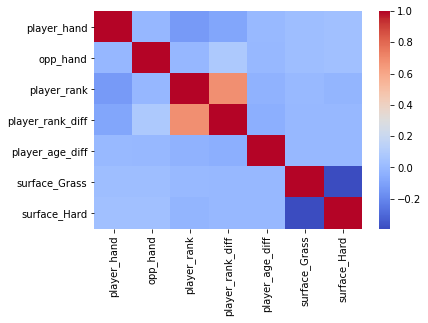

In [315]:
import seaborn as sns
sns.heatmap(X.corr(),cmap='coolwarm')

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.20,random_state=41)

In [317]:
from sklearn.ensemble import RandomForestRegressor 
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [318]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
print("R2:",r2_score(y_test, Y_pred),"MAE:",mean_absolute_error(y_test, Y_pred),'MAPE:',MAPE(y_test, Y_pred))

R2: -0.13860476595749627 MAE: 0.989050141058179 MAPE: 10.745827735205783


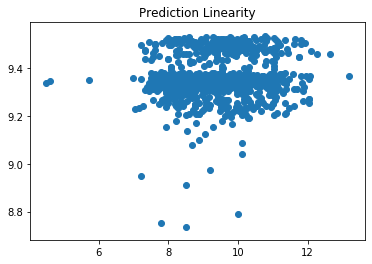

0.04204569023330253


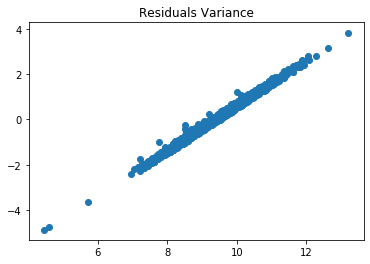

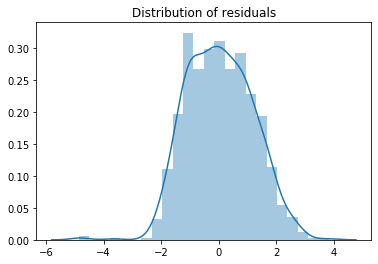

In [319]:
# Checking predictions
plt.scatter(y_test,y_pred)
plt.title('Prediction Linearity')
plt.show()

# Checking residuals
resid=y_test-y_pred

print(resid.mean())
plt.scatter(y_test,resid)
plt.title('Residuals Variance')
plt.show()

sns.distplot(resid)
plt.title('Distribution of residuals')
plt.show()

## Classifier

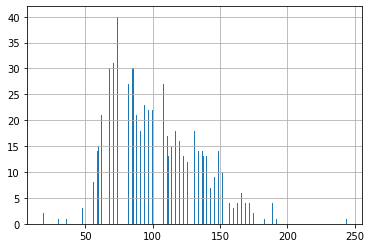

In [344]:
df.minutes.hist(bins=1000)

In [409]:
bins = pd.IntervalIndex.from_tuples([(0, 60),(60,70),(70,80),(80,100),(100,120),(120,150),(150,300)])

In [448]:
df1['bin_minutes']=pd.cut(df1['minutes'],bins,[0:6])

SyntaxError: invalid syntax (<ipython-input-448-0f72965e270f>, line 1)

In [411]:
df1["bin_minutes"].value_counts()

(80, 100]     1032
(100, 120]     830
(120, 150]     794
(70, 80]       628
(60, 70]       470
(150, 300]     332
(0, 60]        252
Name: bin_minutes, dtype: int64

In [445]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1["bin_minutes"])
df1["bin_minutes"]=le.transform(df1["bin_minutes"])

In [446]:
df1["bin_minutes"]

0       5
1       3
2       1
3       4
4       5
       ..
4333    2
4334    6
4335    2
4336    2
4337    0
Name: bin_minutes, Length: 4338, dtype: int64

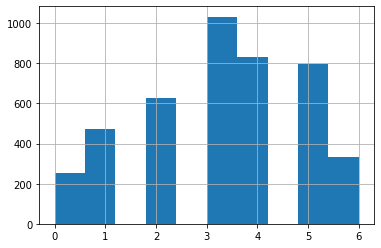

In [414]:
y.cat.codes.hist()

In [386]:
df1.tail()

,player_hand,opp_hand,minutes,player_rank,player_rank_diff,player_age_diff,surface_Grass,surface_Hard,tourney_name_Acapulco,tourney_name_Antalya,tourney_name_Antwerp,tourney_name_Atlanta,tourney_name_Auckland,tourney_name_Australian Open,tourney_name_Barcelona,tourney_name_Basel,tourney_name_Bastad,tourney_name_Beijing,tourney_name_Brisbane,tourney_name_Budapest,tourney_name_Buenos Aires,tourney_name_Canada Masters,tourney_name_Chengdu,tourney_name_Cincinnati Masters,tourney_name_Cordoba,tourney_name_Davis Cup,tourney_name_Delray Beach,tourney_name_Doha,tourney_name_Dubai,tourney_name_Eastbourne,tourney_name_Estoril,tourney_name_Geneva,tourney_name_Gstaad,tourney_name_Halle,tourney_name_Hamburg,tourney_name_Houston,tourney_name_Indian Wells Masters,tourney_name_Kitzbuhel,tourney_name_Los Cabos,tourney_name_Lyon,tourney_name_Madrid Masters,tourney_name_Marrakech,tourney_name_Marseille,tourney_name_Metz,tourney_name_Miami Masters,tourney_name_Monte Carlo Masters,tourney_name_Montpellier,tourney_name_Moscow,tourney_name_Munich,tourney_name_New York,tourney_name_Newport,tourney_name_Paris Masters,tourney_name_Pune,tourney_name_Queen's Club,tourney_name_Rio De Janeiro,tourney_name_Roland Garros,tourney_name_Rome Masters,tourney_name_Rotterdam,tourney_name_Sao Paulo,tourney_name_Shanghai Masters,tourney_name_Sofia,tourney_name_St. Petersburg,tourney_name_Stockholm,tourney_name_Stuttgart,tourney_name_Sydney,tourney_name_Tokyo,tourney_name_Tour Finals,tourney_name_US Open,tourney_name_Umag,tourney_name_Vienna,tourney_name_Washington,tourney_name_Wimbledon,tourney_name_Winston-Salem,tourney_name_Zhuhai,bin_minutes,bin_player_rank_diff
4333,0,1,76.0,362.0,351.0,-0.093087,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(70, 80]",19
4334,1,1,161.0,142.0,131.0,4.139630,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(150, 300]",18
4335,1,1,72.0,116.0,-135.0,-8.369610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(70, 80]",1
4336,1,0,74.0,194.0,-34.0,-2.225873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(70, 80]",5
4337,1,1,56.0,116.0,-221.0,-7.170431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(0, 60]",0


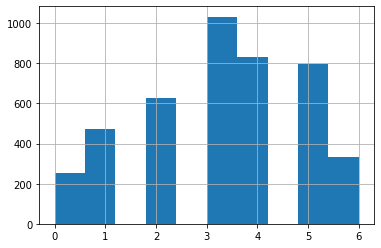

In [419]:
df1.bin_minutes.hist()

In [388]:
df1['bin_player_rank_diff']=pd.qcut(df1['player_rank_diff'],20,labels=False)

In [438]:
y=df1.bin_minutes
X=df1.drop(['minutes','bin_minutes'],axis=1).iloc[:,0:7]

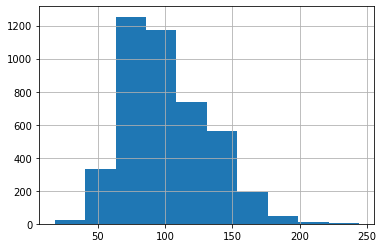

In [439]:
df1.minutes.hist()

In [440]:
X.head()

,player_hand,opp_hand,player_rank,player_rank_diff,player_age_diff,surface_Grass,surface_Hard
0,1,1,9.0,-7.0,6.119097,0,1
1,1,1,16.0,-223.0,-10.819986,0,1
2,1,1,9.0,-31.0,-2.877481,0,1
3,1,1,239.0,208.0,13.837098,0,1
4,1,1,16.0,-2.0,-5.125257,0,1


In [441]:
y.head()

0    5
1    3
2    1
3    4
4    5
Name: bin_minutes, dtype: int32

In [442]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=41)
from sklearn.metrics import confusion_matrix

In [443]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier

In [444]:
print('KNeighborsClassifier(5)')
knn1=KNeighborsClassifier(5)
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
conf1=confusion_matrix(y_test,y_pred1)
print(conf1)
ac1=accuracy_score(y_test,y_pred1)
print('Accuracy:',ac1)
print('-------------------------------------')
#print('NuSVC(nu=0.1)')
#model2_2=NuSVC(nu=0.1)
#model2_2.fit(X_train,y_train)
#pred2_2=model2_2.predict(X_test)
#conf2_2=confusion_matrix(y_test, pred2_2)
#print(conf2_2)
#ac2_2=accuracy_score(y_test, pred2_2)
#print('Accuracy:',ac2_2)
#print('-------------------------------------')
print('DecisionTreeClassifier()')
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test, pred3)
print(conf3)
ac3=accuracy_score(y_test, pred3)
print('Accuracy:',ac3)
print('-------------------------------------')
print('RandomForestClassifier()')
model4=RandomForestClassifier()
model4.fit(X_train,y_train)
pred4=model4.predict(X_test)
conf4=confusion_matrix(y_test, pred4)
print(conf4)
ac4=accuracy_score(y_test, pred4)
print('Accuracy:',ac4)
print('-------------------------------------')
print('RandomForestClassifier balanced')
model4_2=RandomForestClassifier(class_weight='balanced')
model4_2.fit(X_train,y_train)
pred4_2=model4_2.predict(X_test)
conf4_2=confusion_matrix(y_test, pred4_2)
print(conf4_2)
ac4_2=accuracy_score(y_test, pred4_2)
print('Accuracy:',ac4_2)
print('-------------------------------------')
print('AdaBoostClassifier()')
model5=AdaBoostClassifier()
model5.fit(X_train,y_train)
pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test, pred5)
print(conf5)
ac5=accuracy_score(y_test, pred5)
print('Accuracy:',ac5)
print('-------------------------------------')
print('XGBClassifier()')
model6=xgb.XGBClassifier()
model6.fit(X_train,y_train)
pred6=model6.predict(X_test)
pred6=pred6.round()
conf6=confusion_matrix(y_test, pred6)
print(conf6)
ac6=accuracy_score(y_test, pred6)
print('Accuracy:',ac6)
print('-------------------------------------')
print('KNeighborsClassifier distance')
model7=KNeighborsClassifier(n_neighbors=5, weights='distance')
model7.fit(X_train,y_train)
pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test, pred7)
print(conf7)
ac7=accuracy_score(y_test, pred7)
print('Accuracy:',ac7)
print('-------------------------------------')
print('GaussianNB()')
model8=GaussianNB()
model8.fit(X_train,y_train)
pred8=model8.predict(X_test)
conf8=confusion_matrix(y_test, pred8)
print(conf8)
ac8=accuracy_score(y_test, pred8)
print('Accuracy:',ac8)

KNeighborsClassifier(5)
[[ 2  5  6 21  7  8  0]
 [ 7 13 17 30 17  8  4]
 [ 8 14 22 36 17 20  4]
 [19 30 21 54 33 29  9]
 [16 17 33 52 36 20  5]
 [ 9 29 24 51 26 15  8]
 [ 2 13 14 20  9  8  0]]
Accuracy: 0.16359447004608296
-------------------------------------
DecisionTreeClassifier()
[[ 2  8  8 12  7 11  1]
 [ 2 21  8 25 17 14  9]
 [ 6 16 21 27 18 27  6]
 [19 23 25 43 28 39 18]
 [12 18 26 42 32 35 14]
 [ 9 22 23 40 22 34 12]
 [ 4  9  5 22  8 12  6]]
Accuracy: 0.18317972350230416
-------------------------------------
RandomForestClassifier()
[[ 1  2  8 21  8  7  2]
 [ 4 13  8 27 20 19  5]
 [ 3  8 21 30 30 26  3]
 [ 5 24 28 59 29 44  6]
 [ 9 10 18 66 43 32  1]
 [ 3 14 29 48 38 26  4]
 [ 1  6  6 23 11 13  6]]
Accuracy: 0.19470046082949308
-------------------------------------
RandomForestClassifier balanced
[[ 0  4  4 22 10  7  2]
 [ 3 10  9 29 24 16  5]
 [ 6 11 25 29 24 24  2]
 [ 9 25 27 61 30 35  8]
 [ 7  7 22 66 38 35  4]
 [ 2 13 24 51 35 31  6]
 [ 1  5 11 21 12 13  3]]
Accuracy: 0.19

In [ ]:
A=model5.predict(X_test)

In [206]:
X

,player_id,opp_hand,player_age_diff,surface_Clay,surface_Grass,surface_Hard,tourney_name_ATP Next Gen Finals,tourney_name_Acapulco,tourney_name_Adelaide,tourney_name_Antalya,tourney_name_Antwerp,tourney_name_Atlanta,tourney_name_Atp Cup,tourney_name_Auckland,tourney_name_Australian Open,tourney_name_Barcelona,tourney_name_Basel,tourney_name_Bastad,tourney_name_Beijing,tourney_name_Brisbane,tourney_name_Bucharest,tourney_name_Budapest,tourney_name_Buenos Aires,tourney_name_Canada Masters,tourney_name_Casablanca,tourney_name_Chengdu,tourney_name_Chennai,tourney_name_Cincinnati Masters,tourney_name_Cordoba,tourney_name_Davis Cup,tourney_name_Delray Beach,tourney_name_Doha,tourney_name_Dubai,tourney_name_Eastbourne,tourney_name_Estoril,tourney_name_Geneva,tourney_name_Gstaad,tourney_name_Halle,tourney_name_Hamburg,tourney_name_Houston,tourney_name_Indian Wells Masters,tourney_name_Istanbul,tourney_name_Kitzbuhel,tourney_name_Los Cabos,tourney_name_Lyon,tourney_name_Madrid Masters,tourney_name_Marrakech,tourney_name_Marseille,tourney_name_Memphis,tourney_name_Metz,tourney_name_Miami Masters,tourney_name_Monte Carlo Masters,tourney_name_Montpellier,tourney_name_Moscow,tourney_name_Munich,tourney_name_New York,tourney_name_Newport,tourney_name_Nice,tourney_name_Nottingham,tourney_name_Paris Masters,tourney_name_Pune,tourney_name_Queen's Club,tourney_name_Quito,tourney_name_Rio De Janeiro,tourney_name_Rio Olympics,tourney_name_Rio de Janeiro,tourney_name_Roland Garros,tourney_name_Rome Masters,tourney_name_Rotterdam,tourney_name_Santiago,tourney_name_Sao Paulo,tourney_name_Shanghai Masters,tourney_name_Shenzhen,tourney_name_Sofia,tourney_name_St. Petersburg,tourney_name_Stockholm,tourney_name_Stuttgart,tourney_name_Sydney,tourney_name_Tokyo,tourney_name_Tour Finals,tourney_name_US Open,tourney_name_Umag,tourney_name_Vienna,tourney_name_Washington,tourney_name_Wimbledon,tourney_name_Winston-Salem,tourney_name_Zagreb,tourney_name_Zhuhai,bin_player_rank_diff
0,104925,0,-0.966461,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,105138,1,2.209446,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,104925,1,8.725530,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,105583,1,5.891855,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
4,104745,1,12.709103,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,105208,1,5.010267,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
21032,105583,1,-5.177276,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
21033,106432,1,-9.503080,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
21034,104545,1,8.355921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [188]:
Player=Df[['winner_id',"winner_name",'winner_age','winner_hand','winner_rank']]

In [189]:
i="Evan King"

In [190]:
Player=Player.drop_duplicates()

In [204]:
A=Player[Player["winner_name"]==i]['winner_id']
A

8459    105960
Name: winner_id, dtype: int64

In [197]:
B=Player['winner_rank'].where(Player['winner_name'] == name_player1)
B

0       NaN
1       NaN
3       NaN
4       NaN
8       NaN
         ..
15172   NaN
15173   NaN
15176   NaN
15184   NaN
15185   NaN
Name: winner_rank, Length: 8379, dtype: float64

In [182]:
name_player1 = input("Name of the player One? ",)

Name of the player One? Evan King


In [183]:
name_player2 = input("Name of the player Two? ",)

Name of the player Two? Brandon Perez


In [205]:
surface= input("Surface? Clay/Hard/Grass/Carpet ? ",)

Surface? Clay/Hard/Grass/Carpet ? Clay


In [ ]:
if surface == 'Clay':
    surface_Clay=1
    elif surface =='Grass':
        surface_Grass=1
    else surface=='Hard':
        surface_Hard=1

In [ ]:
Test=[A,opp_hand,player_age_diff,surface_Clay,surface_Grass,surface_Hard]